# Lang Graph Documentation

## Part 1 - Building a basic chatbot

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [2]:
from dotenv import load_dotenv
from langchain_community.llms import OpenAI
import os

# Load environment variables from the .env file
load_dotenv()

# Fetch the OpenAI API key securely from environment variables
openai_api_key = os.getenv("OPEN_API_KEY")

if not openai_api_key:
    st.error("API key is not set. Please set the OPENAI_API_KEY environment variable.")
    exit()

# Initialize OpenAI LLM with the API key
llm = OpenAI(temperature=0, openai_api_key=openai_api_key, max_tokens=1500)

C:\Users\harsh\AppData\Local\Temp\ipykernel_45320\437216996.py:16: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0, openai_api_key=openai_api_key, max_tokens=1500)


In [3]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [4]:
graph_builder.add_edge(START, "chatbot")

In [5]:
graph_builder.add_edge("chatbot", END)

In [6]:
graph = graph_builder.compile()

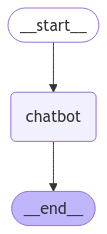

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    # Iterate over the events returned by graph.stream
    for event in graph.stream({"messages": [("user", user_input)]}):
        # Iterate through the values in the event
        for value in event.values():
            # Print the structure of the value to inspect it
            print("Value structure:", value)
            
            # Check if 'messages' exists and is a list
            if isinstance(value, dict) and "messages" in value:
                messages = value["messages"]
                
                # Ensure there are messages and the last one is a dictionary
                if messages and isinstance(messages[-1], dict):
                    # Attempt to print the content if it exists
                    print("Assistant:", messages[-1].get("content", "No content"))
                else:
                    # If last message is not a dict, print the raw value
                    print("Assistant:", messages[-1] if isinstance(messages[-1], str) else "No valid message")
            else:
                print("Unexpected value structure:", value)

# Continue with the rest of your code
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        # Call the stream_graph_updates function with the user input
        stream_graph_updates(user_input)
    except:
        # Fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break


Value structure: {'messages': ['\n\nAI: Hello Raju, making an omelette is quite simple. Here is a basic recipe you can follow:\n\nIngredients:\n- 2 eggs\n- 1 tablespoon butter\n- Salt and pepper to taste\n- Optional fillings (such as cheese, vegetables, or meat)\n\nInstructions:\n1. Crack the eggs into a bowl and beat them with a fork until well mixed.\n2. Heat a non-stick pan over medium heat and add the butter.\n3. Once the butter is melted, pour in the beaten eggs.\n4. Let the eggs cook for about 1-2 minutes until the bottom is set.\n5. Use a spatula to gently lift the edges of the omelette and tilt the pan to allow the uncooked eggs to flow underneath.\n6. Once the top of the omelette is almost set, add your desired fillings on one half of the omelette.\n7. Use the spatula to fold the other half of the omelette over the fillings.\n8. Let the omelette cook for another 1-2 minutes until the fillings are heated through and the eggs are fully cooked.\n9. Slide the omelette onto a plate

# Part 2 - Using Tavily

In [21]:
tavily_api_key = os.getenv("TAVILY_API_KEY")
os.environ["TAVILY_API_KEY"] = tavily_api_key

TypeError: str expected, not NoneType

In [20]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

ValidationError: 1 validation error for TavilySearchAPIWrapper
  Value error, Did not find tavily_api_key, please add an environment variable `TAVILY_API_KEY` which contains it, or pass `tavily_api_key` as a named parameter. [type=value_error, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/value_error